<a href="https://colab.research.google.com/github/Clalva02/TFG/blob/main/TFG_Higgs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as pp
import random
!pip install pandas 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, LeakyReLU, Embedding, SimpleRNN, Input
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.utils import to_categorical
import sklearn.metrics
import sklearn

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/TFG/training.csv',sep=',')
datatest=pd.read_csv('/content/drive/MyDrive/TFG/test.csv',sep=',')

In [ ]:
data.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [ ]:
X=data.iloc[:,1:31]
Y=pd.factorize(data['Label'])[0]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=2)
print(Y)

[0 1 1 ... 0 1 1]


In [ ]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
Y_train = to_categorical(Y_train)
Y_test= to_categorical(Y_test)

In [ ]:
print(np.shape(X_train),np.shape(Y_train),np.shape(X_test),np.shape(Y_test))
print(type(X_train),type(Y_train),type(X_test),type(Y_test))

(187500, 30) (187500, 2) (62500, 30) (62500, 2)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
model = Sequential()
model.add(Dense(30, activation='relu', input_shape=(X_train[0].shape)))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_10 (Dense)             (None, 50)                1550      
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 102       
Total params: 2,582
Trainable params: 2,582
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(X_train, Y_train,validation_split = 0.25,epochs=30, verbose=1)

Epoch 1/30
4395/4395 [==============================] - 8s 2ms/step - loss: 0.4613 - accuracy: 0.7731 - val_loss: 0.3895 - val_accuracy: 0.8231
Epoch 2/30
4395/4395 [==============================] - 7s 2ms/step - loss: 0.3858 - accuracy: 0.8258 - val_loss: 0.3780 - val_accuracy: 0.8303
Epoch 3/30
4395/4395 [==============================] - 7s 2ms/step - loss: 0.3786 - accuracy: 0.8280 - val_loss: 0.3765 - val_accuracy: 0.8304
Epoch 4/30
4395/4395 [==============================] - 7s 2ms/step - loss: 0.3733 - accuracy: 0.8323 - val_loss: 0.3786 - val_accuracy: 0.8283
Epoch 5/30
4395/4395 [==============================] - 7s 2ms/step - loss: 0.3706 - accuracy: 0.8326 - val_loss: 0.3737 - val_accuracy: 0.8325
Epoch 6/30
4395/4395 [==============================] - 7s 2ms/step - loss: 0.3687 - accuracy: 0.8344 - val_loss: 0.3757 - val_accuracy: 0.8299
Epoch 7/30
4395/4395 [==============================] - 7s 2ms/step - loss: 0.3667 - accuracy: 0.8343 - val_loss: 0.3696 - val_accuracy:

1954/1954 [==============================] - 2s 923us/step - loss: 0.3672 - accuracy: 0.8343


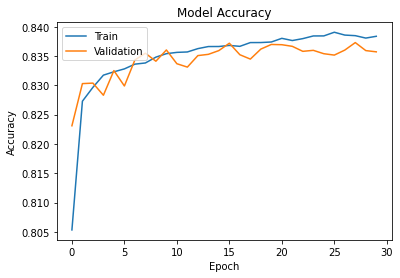

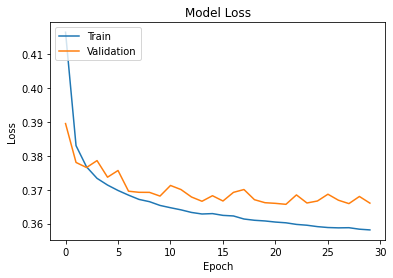

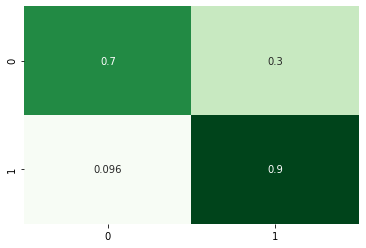

In [ ]:
model.evaluate(X_test, Y_test)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
#plt.savefig('/content/drive/MyDrive/TFG/CNN1/Acuracy.png')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
#plt.savefig('/content/drive/MyDrive/TFG/CNN1/Loss.png')
plt.show()
Y_pred=np.argmax(model.predict(X_test),axis=1)
Y_test2=np.argmax(Y_test,axis=1)
confusion = sklearn.metrics.confusion_matrix(Y_test2,Y_pred,normalize='true')
import seaborn as sb
sb.heatmap(confusion,cbar=False,cmap='Greens',annot=True)
#plt.savefig('/content/drive/MyDrive/TFG/CNN1/CM.png')
plt.show()

In [ ]:
model = Sequential()
model.add(Dense(30, activation='relu', input_shape=(X_train[0].shape)))
model.add(Dense(50, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_13 (Dense)             (None, 50)                1550      
_________________________________________________________________
dense_14 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_15 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 102       
Total params: 12,732
Trainable params: 12,732
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(X_train, Y_train,validation_split = 0.25 ,epochs=30, verbose=1) #Verbose=0 (silent) Verbose=1 (progress bar)

Epoch 1/30
4395/4395 [==============================] - 10s 2ms/step - loss: 0.4417 - accuracy: 0.7894 - val_loss: 0.3814 - val_accuracy: 0.8285
Epoch 2/30
4395/4395 [==============================] - 9s 2ms/step - loss: 0.3852 - accuracy: 0.8249 - val_loss: 0.3754 - val_accuracy: 0.8326
Epoch 3/30
4395/4395 [==============================] - 9s 2ms/step - loss: 0.3770 - accuracy: 0.8295 - val_loss: 0.3759 - val_accuracy: 0.8318
Epoch 4/30
4395/4395 [==============================] - 9s 2ms/step - loss: 0.3724 - accuracy: 0.8316 - val_loss: 0.3720 - val_accuracy: 0.8337
Epoch 5/30
4395/4395 [==============================] - 9s 2ms/step - loss: 0.3685 - accuracy: 0.8332 - val_loss: 0.3687 - val_accuracy: 0.8340
Epoch 6/30
4395/4395 [==============================] - 9s 2ms/step - loss: 0.3672 - accuracy: 0.8336 - val_loss: 0.3784 - val_accuracy: 0.8296
Epoch 7/30
4395/4395 [==============================] - 9s 2ms/step - loss: 0.3677 - accuracy: 0.8344 - val_loss: 0.3729 - val_accuracy

1954/1954 [==============================] - 2s 1ms/step - loss: 0.3719 - accuracy: 0.8330


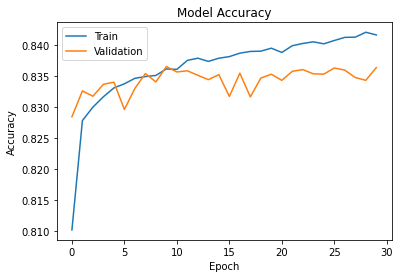

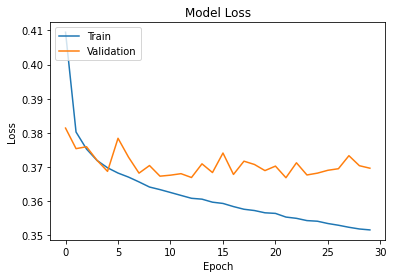

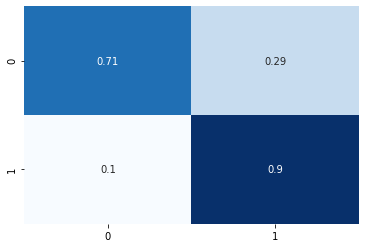

In [ ]:
#model.save('/content/drive/MyDrive/TFG/CNN1')
model.evaluate(X_test, Y_test)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
#plt.savefig('/content/drive/MyDrive/TFG/CNN1/Acuracy.png')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
#plt.savefig('/content/drive/MyDrive/TFG/CNN1/Loss.png')
plt.show()
Y_pred=np.argmax(model.predict(X_test),axis=1)
Y_test2=np.argmax(Y_test,axis=1)
confusion = sklearn.metrics.confusion_matrix(Y_test2,Y_pred,normalize='true')
import seaborn as sb
sb.heatmap(confusion,cbar=False,cmap='Blues',annot=True)
#plt.savefig('/content/drive/MyDrive/TFG/CNN1/CM.png')
plt.show()